In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#import citipy
from citipy import citipy

## Module 6.1.5 - using citipy to get nearest city to coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

## Module 6.2 - using Open Weather Map API key

In [21]:
import requests
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | roma
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | alipur
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | ullapool
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | paranga
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | takaka
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | stepnoye
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | myskhako
Processing Record 19 of Set 1 | antalaha
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Se

City not found. Skipping...
Processing Record 41 of Set 4 | houlung
City not found. Skipping...
Processing Record 42 of Set 4 | tay ninh
Processing Record 43 of Set 4 | tutoia
Processing Record 44 of Set 4 | syamzha
Processing Record 45 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 4 | anakapalle
Processing Record 47 of Set 4 | ormara
Processing Record 48 of Set 4 | howard springs
Processing Record 49 of Set 4 | mayo
Processing Record 50 of Set 4 | aquiraz
Processing Record 1 of Set 5 | thohoyandou
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | chimore
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | san vicente
Processing Record 6 of Set 5 | makakilo city
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | santa ana
Processing Record 9 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 10 of Set 5 | qaqortoq
Processing Record 11 of Set 5 | pevek
Processing Record 12 of Set 5 | b

Processing Record 28 of Set 8 | marsh harbour
Processing Record 29 of Set 8 | jieshi
Processing Record 30 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 31 of Set 8 | colac
Processing Record 32 of Set 8 | atbasar
Processing Record 33 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | las vegas
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | aswan
Processing Record 39 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 8 | lufilufi
Processing Record 41 of Set 8 | kenai
Processing Record 42 of Set 8 | jamame
Processing Record 43 of Set 8 | quelimane
Processing Record 44 of Set 8 | yirol
City not found. Skipping...
Processing Record 45 of Set 8 | lyngdal
Processing Record 46 of Set 8 | oregon
Processing Record 47 of Set 8 | burnie
Processing Record 48 of Set 8 | lyubytino
Processing Record 49 of Set 8 | nichina

Processing Record 12 of Set 12 | am timan
Processing Record 13 of Set 12 | sioux lookout
Processing Record 14 of Set 12 | sesheke
Processing Record 15 of Set 12 | ruteng
Processing Record 16 of Set 12 | seeboden
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | yefira
City not found. Skipping...
Processing Record 19 of Set 12 | okato
Processing Record 20 of Set 12 | bratsk
Processing Record 21 of Set 12 | novyy buyan
Processing Record 22 of Set 12 | rafai
Processing Record 23 of Set 12 | toamasina
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | pontianak
Processing Record 26 of Set 12 | altay
Processing Record 27 of Set 12 | trairi
Processing Record 28 of Set 12 | sao geraldo do araguaia
Processing Record 29 of Set 12 | dunedin
Processing Record 30 of Set 12 | axim
Processing Record 31 of Set 12 | aklavik
Processing Record 32 of Set 12 | waipawa
Processing Record 33 of Set 12 | sakaiminato
Processing Record 34 of Set 12 | gazli
Proce

In [24]:
city_data

[{'City': 'Saint Anthony',
  'Lat': 45.0205,
  'Lng': -93.218,
  'Max Temp': 36.93,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 18.41,
  'Country': 'US',
  'Date': '2022-03-23 21:49:38'},
 {'City': 'Bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 45.77,
  'Humidity': 46,
  'Cloudiness': 100,
  'Wind Speed': 10.36,
  'Country': 'US',
  'Date': '2022-03-23 21:50:11'},
 {'City': 'Roma',
  'Lat': 43.2128,
  'Lng': -75.4557,
  'Max Temp': 47.08,
  'Humidity': 41,
  'Cloudiness': 100,
  'Wind Speed': 17.27,
  'Country': 'US',
  'Date': '2022-03-23 21:48:23'},
 {'City': 'Dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': 4.21,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 7.99,
  'Country': 'RU',
  'Date': '2022-03-23 21:50:12'},
 {'City': 'Alipur',
  'Lat': 29.3846,
  'Lng': 70.9116,
  'Max Temp': 73.02,
  'Humidity': 28,
  'Cloudiness': 0,
  'Wind Speed': 3.8,
  'Country': 'PK',
  'Date': '2022-03-23 21:50:12'},
 {'City': 'Talnakh',
  'Lat': 69.4865,
 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,36.93,87,100,18.41,US,2022-03-23 21:49:38
1,Bethel,41.3712,-73.4140,45.77,46,100,10.36,US,2022-03-23 21:50:11
2,Roma,43.2128,-75.4557,47.08,41,100,17.27,US,2022-03-23 21:48:23
3,Dikson,73.5069,80.5464,4.21,94,100,7.99,RU,2022-03-23 21:50:12
4,Alipur,29.3846,70.9116,73.02,28,0,3.80,PK,2022-03-23 21:50:12
5,Talnakh,69.4865,88.3972,7.21,82,100,9.19,RU,2022-03-23 21:50:13
6,Ullapool,57.8987,-5.1604,45.36,69,6,4.38,GB,2022-03-23 21:50:13
7,Hobart,-42.8794,147.3294,59.05,69,75,10.36,AU,2022-03-23 21:50:14
8,Paranga,56.7039,49.4047,32.99,87,99,9.15,RU,2022-03-23 21:50:14
9,Rikitea,-23.1203,-134.9692,79.97,70,52,14.72,PF,2022-03-23 21:50:14


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Anthony,US,2022-03-23 21:49:38,45.0205,-93.2180,36.93,87,100,18.41
1,Bethel,US,2022-03-23 21:50:11,41.3712,-73.4140,45.77,46,100,10.36
2,Roma,US,2022-03-23 21:48:23,43.2128,-75.4557,47.08,41,100,17.27
3,Dikson,RU,2022-03-23 21:50:12,73.5069,80.5464,4.21,94,100,7.99
4,Alipur,PK,2022-03-23 21:50:12,29.3846,70.9116,73.02,28,0,3.80
...,...,...,...,...,...,...,...,...,...
556,North Bend,US,2022-03-23 22:05:58,43.4065,-124.2243,64.24,79,100,12.66
557,Meiganga,CM,2022-03-23 22:05:58,6.5167,14.3000,74.05,21,92,2.77
558,Ust-Nera,RU,2022-03-23 22:05:59,64.5667,143.2000,3.69,98,98,3.76
559,San Alberto,CO,2022-03-23 22:05:59,7.7611,-73.3922,91.31,54,24,3.96


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Module 6.3 - Side project: kids in STEM (not associated with the challenge)

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

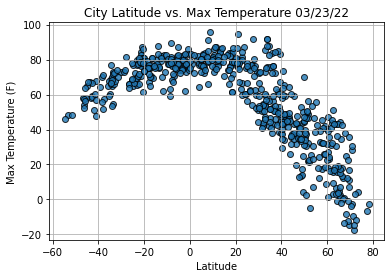

In [32]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

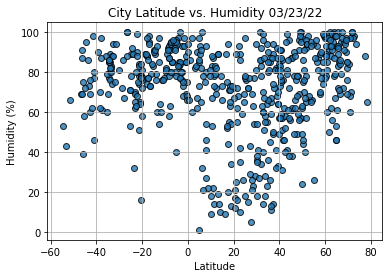

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


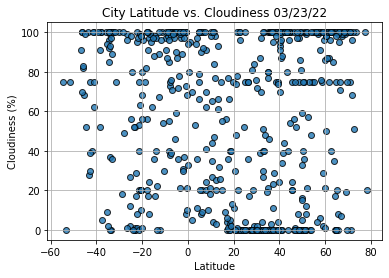

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()